In [3]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
# load data(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]

img_rows, img_cols = 28,28
read=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/trainset28.csv").values
arr=np.array
arr = read.reshape(18367,28,28,1)
x_train=arr
readt=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/testset28.csv").values
arrt=np.array
arrt = readt.reshape(80,28,28,1)
x_test=arrt
y_train=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/training_label28.csv").values
y_test=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/Test_label.csv").values


img_rows, img_cols = 28, 28
im_shape = (img_rows, img_cols, 1)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train=x_train
X_test=x_test

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
# define the larger model
def modelv2():
    model=Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
    model.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model=modelv2()
history = model.fit(X_train, y_train,batch_size=100, epochs=50,validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

66
Epoch 1/50
184/184 [==============================] - 30s 161ms/step - loss: 3.9520 - accuracy: 0.0486 - val_loss: 3.3106 - val_accuracy: 0.0875
Epoch 2/50
184/184 [==============================] - 28s 152ms/step - loss: 2.5607 - accuracy: 0.2740 - val_loss: 1.8044 - val_accuracy: 0.4750
Epoch 3/50
184/184 [==============================] - 29s 158ms/step - loss: 1.7098 - accuracy: 0.4722 - val_loss: 1.2233 - val_accuracy: 0.7125
Epoch 4/50
184/184 [==============================] - 28s 150ms/step - loss: 1.2943 - accuracy: 0.5893 - val_loss: 0.6334 - val_accuracy: 0.8125
Epoch 5/50
184/184 [==============================] - 29s 156ms/step - loss: 1.0158 - accuracy: 0.6743 - val_loss: 0.5595 - val_accuracy: 0.8250
Epoch 6/50
184/184 [==============================] - 27s 144ms/step - loss: 0.8791 - accuracy: 0.7105 - val_loss: 0.5863 - val_accuracy: 0.8250
Epoch 7/50
184/184 [==============================] - 26s 140ms/step - loss: 0.7602 - accuracy: 0.7513 - val_loss: 0.4725 - val

In [4]:
model.save("C:/Users/helid/PycharmProjects/GujOCR/model/CNN89.h5")
print("Saved model to disk")

Saved model to disk


In [6]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('C:/Users/helid/PycharmProjects/GujOCR/model/CNN89.h5')

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_15 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)       

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


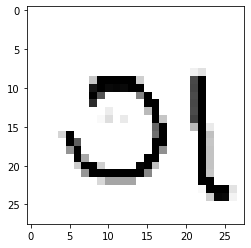

Predicted character is:ગ


In [16]:

dict = {'ં': 0, 'ઃ': 1, 'અ': 2, 'અં': 3, 'અઃ': 4, 'આ': 5, 'ઇ': 6,
              'ઈ': 7, 'ઉ': 8, 'ઊ': 9, 'એ': 10, 'ઐ': 11, 'ઔ': 12, 'ક': 13,
              'ક્ષ': 14, 'ખ': 15, 'ગ': 16, 'ઘ': 17, 'ચ': 18, 'છ': 19, 'જ': 20,
              'જ્ઞ': 21, 'ઝ': 22, 'ટ': 23, 'ઠ': 24, 'ડ': 25, 'ઢ': 26, 'ણ': 27,
              'ત': 28, 'થ': 29, 'દ': 30, 'ધ': 31, 'ન': 32, 'પ': 33, 'ફ': 34,
              'બ': 35, 'ભ': 36, 'મ': 37, 'ય': 38, 'ર': 39, 'લ': 40, 'ળ': 41,
              'વ': 42, 'શ': 43, 'ષ': 44, 'સ': 45, 'હ': 46, 'ા': 47, 'િ': 48,
              'ી': 49, 'ુ': 50, 'ૂ': 51, 'ે': 52, 'ૈ': 53, 'ો': 54, 'ૌ': 55,
              '૦': 56, '૧': 57, '૨': 58, '૩': 59, '૪': 60, '૫': 61, '૬': 62,
              '૭': 63, '૮': 64, '૯': 65}
key_list = list(dict.keys()) 
val_list = list(dict.values()) 
example = x_test[29]
prediction = model.predict(example.reshape(1,28,28, 1))
print(prediction)
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
#print (hard_maxed_prediction)

plt.imshow(example.reshape(28,28), cmap="gray")
plt.show()
a = int(np.argmax(prediction))
print('Predicted character is:'+ list(dict.keys())[list(dict.values()).index(a)])
